In [71]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
complete_data = pd.merge(clinical_trial_data, mouse_drug_data , how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [72]:
export_csv = complete_data.to_csv (r'Results/complete_data.csv', index = None, header=True)

## Tumor Response to Treatment

In [73]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = complete_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_volume = mean_tumor_volume.reset_index()

# Preview DataFrame
mean_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [74]:
complete_data.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


In [75]:
# Store the Standard Deviation of Tumor Volumes Grouped by Drug and Timepoint
std_tumor_volume = complete_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].std()

# Convert to DataFrame
std_tumor_volume = std_tumor_volume.reset_index()

# Preview DataFrame
std_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,2.242964
2,Capomulin,10,3.513422
3,Capomulin,15,4.108369
4,Capomulin,20,4.362915


In [76]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

# Method 1: Pivot Table
# able_mean_volume = pd.pivot_table(complete_data,index=["Timepoint"], 
#                                  values=["Tumor Volume (mm3)"],aggfunc=[np.mean], 
#                                  columns=["Drug"])

# Method 2: Crosstab

# Table_mean_volume = pd.crosstab(complete_data["Timepoint"], 
#                               complete_data['Drug'],
#                               values=complete_data['Tumor Volume (mm3)'], 
#                               aggfunc='mean')
# Method 3: Unstack
table_mean_volume = complete_data.groupby(['Timepoint', 'Drug'])['Tumor Volume (mm3)'].mean().unstack().fillna(0)
table_mean_volume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


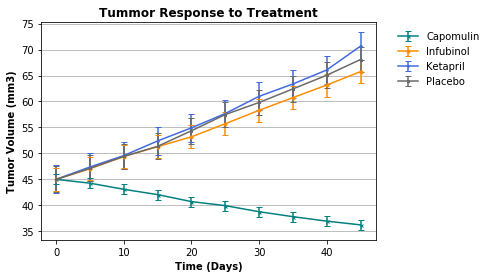

In [77]:
# Generate the Plot (with Error Bars)
x = complete_data["Timepoint"].unique()

columns = table_mean_volume.columns

markers=['x', '-', 'o', '.', '+', '*','^', 's', 'p', 'P', '8']
colors=['teal', 'indigo', 'darkorange', 'royalblue', 'yellow', 'dimgray','orange', 'pink', 'grey', 'P', '8']
i=0
for column in columns:
    if column in {"Capomulin", "Infubinol", "Ketapril", "Placebo"}:
        plt.errorbar(x, table_mean_volume[column], sem(table_mean_volume[column]), 
                     label=column, fmt=markers[i], linestyle='solid', 
                     color=colors[i], capsize=3, markersize=3)
    i+=1

    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", frameon=False);
plt.title("Tummor Response to Treatment" ,fontweight="bold");
plt.xlabel("Time (Days)" ,fontweight="bold");
plt.ylabel("Tumor Volume (mm3)" ,fontweight="bold");
plt.grid(b=None, which='major', axis='y')

# Save the Figure
plt.savefig('Results/Tummor Response to Treatment.png', bbox_inches='tight')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [78]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_sites = complete_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_metastatic_sites = mean_metastatic_sites.reset_index()

# Preview DataFrame
mean_metastatic_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [79]:
# Store the Standard Deviation associated with Met. Sites Grouped by Drug and Timepoint 
std_metastatic_sites = complete_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].std()

# Convert to DataFrame
std_metastatic_sites = std_tumor_volume.reset_index()

# Preview DataFrame
std_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,2.242964
2,Capomulin,10,3.513422
3,Capomulin,15,4.108369
4,Capomulin,20,4.362915


In [80]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

# Method 1: Pivot Table
# table_mean_sites = pd.pivot_table(complete_data,index=["Timepoint"], 
#                                  values=["Metastatic Sites"],aggfunc=[np.mean], 
#                                  columns=["Drug"])

# Method 2: Crosstab
# table_mean_sites = pd.crosstab(complete_data["Timepoint"], 
#                               complete_data['Drug'],
#                               values=complete_data['Metastatic Sites'], 
#                               aggfunc='mean')
# Method 3: Unstack
table_mean_sites = complete_data.groupby(['Timepoint', 'Drug'])['Metastatic Sites'].mean().unstack().fillna(0)
table_mean_sites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


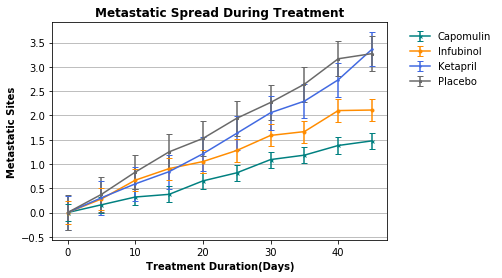

In [81]:
# Generate the Plot (with Error Bars)
x = complete_data["Timepoint"].unique()

columns = table_mean_sites.columns

markers=['x', '-', 'o', '.', '+', '*','^', 's', 'p', 'P', '8']
colors=['teal', 'indigo', 'darkorange', 'royalblue', 'yellow', 'dimgray','orange', 'pink', 'grey', 'P', '8']
i=0
for column in columns:
    if column in {"Capomulin", "Infubinol", "Ketapril", "Placebo"}:
        plt.errorbar(x, table_mean_sites[column], sem(table_mean_sites[column]), 
                     label=column, fmt=markers[i], linestyle='solid', 
                     color=colors[i], capsize=3, markersize=3)
    i+=1
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", frameon=False);
plt.title("Metastatic Spread During Treatment" ,fontweight="bold");
plt.xlabel("Treatment Duration(Days)" ,fontweight="bold");
plt.ylabel("Metastatic Sites" ,fontweight="bold");
plt.grid(b=None, which='major', axis='y')

# Save the Figure
plt.savefig('Results/Metastatic Spread During Treatment.png', bbox_inches='tight')
# Show the Figure
plt.show()

## Survival Rates

In [82]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice = complete_data.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
count_mice = count_mice.reset_index()
count_mice = count_mice.rename(columns={"Mouse ID" : "Mouse Count"})

# Preview DataFrame
count_mice.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [83]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

# Method 1: Pivot Table
# table_mean_mouse = pd.pivot_table(complete_data,index=["Timepoint"], 
#                                  values=["Mouse ID"],aggfunc=[np.count], 
#                                  columns=["Drug"])

# Method 2: Crosstab
# table_mean_mouse = pd.crosstab(complete_data["Timepoint"], 
#                               complete_data['Drug'],
#                               values=complete_data['Mouse ID'], 
#                               aggfunc='count')
# Method 3: Unstack
table_mean_mouse = complete_data.groupby(['Timepoint', 'Drug'])['Mouse ID'].count().unstack().fillna(0)
table_mean_mouse.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


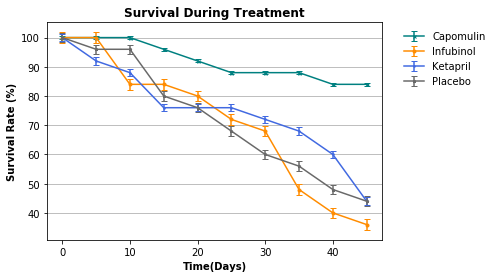

In [84]:
# Generate the Plot (Accounting for percentages)
x = complete_data["Timepoint"].unique()

columns = table_mean_mouse.columns

markers=['x', '-', 'o', '.', '+', '*','^', 's', 'p', 'P', '8']
colors=['teal', 'indigo', 'darkorange', 'royalblue', 'yellow', 'dimgray','orange', 'pink', 'grey', 'P', '8']
i=0
for column in columns: # From the 25 mice that started in day 0
    if column in {"Capomulin", "Infubinol", "Ketapril", "Placebo"}:
        plt.errorbar(x, table_mean_mouse[column]/25*100, sem(table_mean_mouse[column]), 
                     label=column, fmt=markers[i], linestyle='solid', 
                     color=colors[i], capsize=3, markersize=3)
    i+=1
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", frameon=False);
plt.title("Survival During Treatment" ,fontweight="bold");
plt.xlabel("Time(Days)" ,fontweight="bold");
plt.ylabel("Survival Rate (%)" ,fontweight="bold");
plt.grid(b=None, which='major', axis='y')

# Save the Figure
plt.savefig('Results/Survival During Treatment.png', bbox_inches='tight')
# Show the Figure
plt.show()

## Summary Bar Graph

In [85]:
# Calculate the percent changes for each drug
tumor_change = mean_tumor_volume[mean_tumor_volume["Timepoint"] == 45][["Drug","Tumor Volume (mm3)"]] 
tumor_change["Change"] = ((tumor_change["Tumor Volume (mm3)"] / 45 ) - 1)*100

tumor_change = tumor_change[["Drug", "Change"]].reset_index(drop=True) #.set_index("Drug", drop=True)

# Display the data to confirm
tumor_change

,Drug,Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [86]:
# Splice the data between passing and failing drugs   
bins = [-100, 0, 100]
group_names = ["Passing", "Failing"]
tumor_change["Test"] = pd.cut(tumor_change["Change"], bins, labels=group_names)

group_names = ["green", "red"]
tumor_change["Color"] = pd.cut(tumor_change["Change"], bins, labels=group_names)
tumor_change

,Drug,Change,Test,Color
0,Capomulin,-19.475303,Passing,green
1,Ceftamin,42.516492,Failing,red
2,Infubinol,46.123472,Failing,red
3,Ketapril,57.028795,Failing,red
4,Naftisol,53.923347,Failing,red
5,Placebo,51.297960,Failing,red
6,Propriva,47.241175,Failing,red
7,Ramicane,-22.320900,Passing,green
8,Stelasyn,52.085134,Failing,red
9,Zoniferol,46.579751,Failing,red


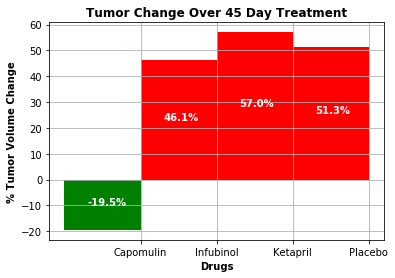

In [87]:
# Generate the Plot (Accounting for percentages)
selected = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

tumor_change_selected = tumor_change[tumor_change["Drug"].isin(selected)]

bars = plt.bar(tumor_change_selected["Drug"], tumor_change_selected["Change"], 
               color=tumor_change_selected["Color"], align='edge', 
               width=-1, tick_label=tumor_change_selected["Drug"])
plt.title("Tumor Change Over 45 Day Treatment" ,fontweight="bold");
plt.xlabel("Drugs" ,fontweight="bold");
plt.ylabel("% Tumor Volume Change" ,fontweight="bold");
plt.grid(b=None, which='major', axis='both')

i = -0.7

bar_label = tumor_change_selected["Change"]


for bar in bars:
    plt.text(i, bar.get_height()/2, f"{round(bar.get_height(),1)}%", color="white", fontweight="bold")
    i+=1

# Save the Figure
plt.savefig('Results/Tumor Change Over 45 Day Treatment.png', bbox_inches='tight')
# Show the Figure
plt.show()